In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Using Normal Equation to compute weights for Linear Regression

In [2]:
np.random.seed(42)
m=100
X = 2*np.random.rand(m,1)
y = 4 + 3*X + np.random.randn(m,1) #The third term here is adding noise to the data

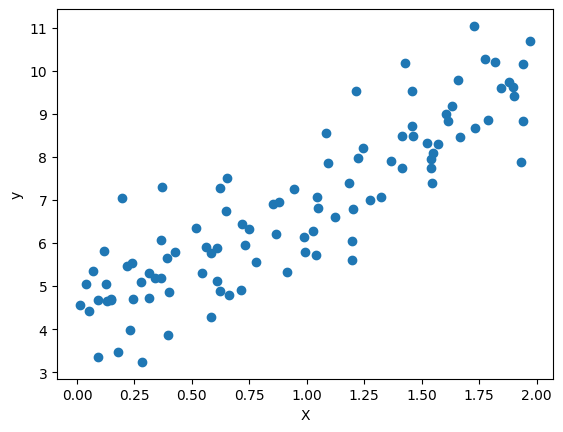

In [3]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
## Computing theta from the normal equation.
from sklearn.preprocessing import add_dummy_feature
X_b =  add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
#Making Predictions using the theta_best value.
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

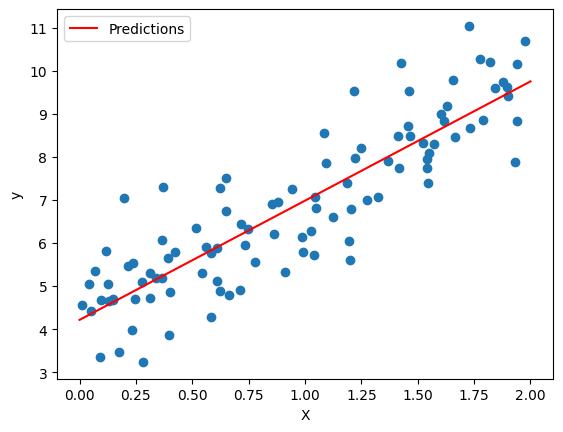

In [7]:
#Plotting the predictions.
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.scatter(X,y)
plt.legend()
plt.xlabel("X")
plt.ylabel('y')
plt.show()

In [8]:
#Performing the same task with sklearn's library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Using Gradient Descent

In [10]:
eta = 0.1 #Learning Rate
n_epochs = 1000
m = len(X_b)

In [11]:
theta = np.random.randn(2,1) #Random initialisation of model parameters

In [12]:
for epoch in range(n_epochs):
    gradients = 2 / m *X_b.T@(X_b@theta - y)
    theta = theta - eta*gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

## Using Stochastic Gradient Descent

In [23]:
t0, t1 = 5, 50
n_epochs = 100

In [24]:
def learning_schedule(t):
    return t0/(t + t1)

In [25]:
theta = np.random.randn(2,1)

In [26]:
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2*xi.T @ (xi@theta - yi)
        eta = learning_schedule(epoch *m + iteration)
        theta = theta - eta * gradients

In [27]:
theta

array([[4.20451275],
       [2.81658948]])

## Polynomial Regression

In [30]:
m = 100
X = 6*np.random.rand(m,1) -3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

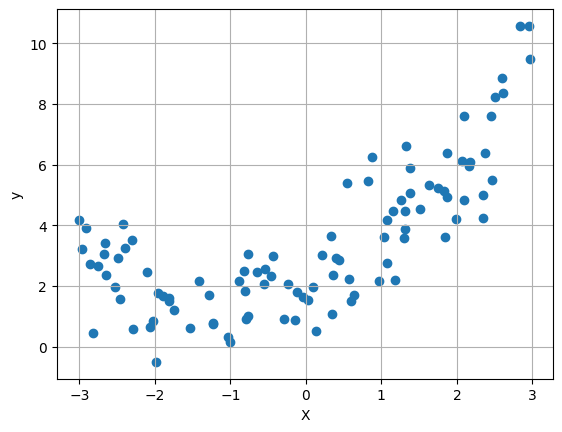

In [32]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

In [37]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

In [38]:
train_sizes, train_scores, valid_scores = learning_curve(
polynomial_regression, X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,scoring = 'neg_root_mean_squared_error')